# Exercise_4-9_part-2

### 1. Imports libraries and dataframes
### 2. Creating first visualizations
 #### 2.1. Bar chart
 #### 2.2. Histogram
 #### 2.1. Scatter Plot
 #### 2.1. Line Chart
### 3. Histogram - order_hour_of_day
### 4. Bar chart - loyalty_flag
### 5. Line -  prices vs hour of the day
### 6. Line chart - age and number of dependents
### 7. Scatter - age vs. income


## 1. Imports libraries and dataframes

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Importing the dataframes

# creates a path with the source folder
path = r'C:\Users\Marc\Mariana_CareerFoundry'

# importing the dataframes 

ords_prods_merge = pd.read_pickle(os.path.join(path, '02_Data','2-2_Prepared', 'ords_prods_merge_flags.pkl'))

customers = pd.read_pickle(os.path.join(path, '02_Data','2-2_Prepared', 'customers_checked.pkl'))

departments = pd.read_csv(os.path.join(path, '02_Data','2-1_Original', 'departments.csv'))

## 2. Creating first visualizations

### 2.1. Bar Chart

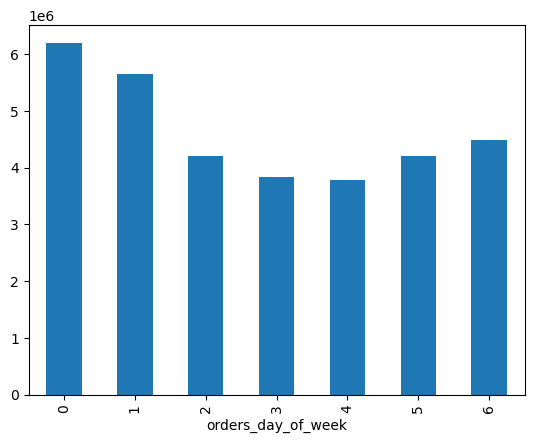

In [3]:
# Creating bar chart

bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [4]:
# Saving bar chart

bar.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'bar_orders_dow.png')) 

### 2.2. Histogram

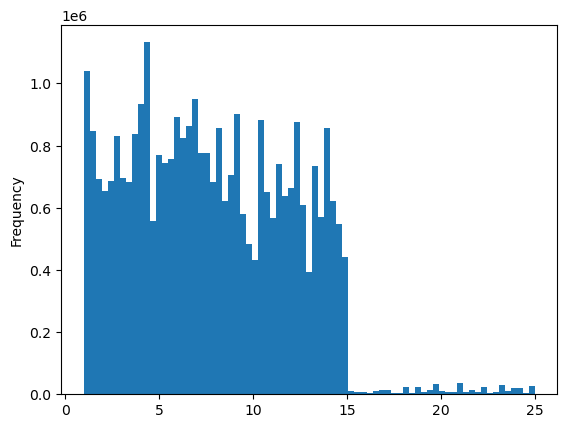

In [5]:
# Creating histogram

hist = ords_prods_merge['prices'].plot.hist(bins = 75) 

In [6]:
# Saving bar chart

hist.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'hist_orders_dow.png')) 

### 2.3. Scatter Chart

In [7]:
# checking the possibilities for a scatterplot

ords_prods_merge.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,aisle_id,department_id,prices,_merge,max_order,loyalty_flag,mean_price,spender_flag,frequency_customer,frequent_flag
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,77,7,9.0,both,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
1,2539329,1,prior,1,2,8,NaN,14084,2,0,...,91,16,12.5,both,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
2,2539329,1,prior,1,2,8,NaN,12427,3,0,...,23,19,4.4,both,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
3,2539329,1,prior,1,2,8,NaN,26088,4,0,...,23,19,4.7,both,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
4,2539329,1,prior,1,2,8,NaN,26405,5,0,...,54,17,1.0,both,10,New customer,6.367797,Low spender,20.5,Non-frequent customer


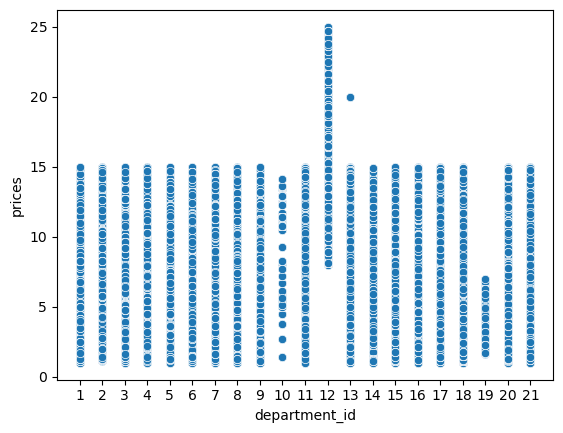

In [8]:
# Creating scatterplot

scat = sns.scatterplot(x = 'department_id', y = 'prices', data = ords_prods_merge)
scat.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21])

In [9]:
# for orientation
departments.T

,0
department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta


In [10]:
# Exporting the plot

scat.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'scatter_prices_department-id.png')) 

### 2.4. Creating a line chart

#### Subsetting the data

In [11]:
# Creating a randomized list to test np.random.rant () <= 0.7to sample the data

np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [12]:
# Splitting the dataframe into two samples

# Store 70% of the sample in datafram big
big = ords_prods_merge[dev] 

# Store 70% of the sample in datafram small
small = ords_prods_merge[~dev]

In [13]:
# Checking the sizes
len(ords_prods_merge)

32404859

In [14]:
len(big) + len(small)

32404859

In [15]:
# Creates a new smaller dataframe
df_2 = small[['orders_day_of_week','prices']]

#### Doing the plot

C:\Users\Marc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Marc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


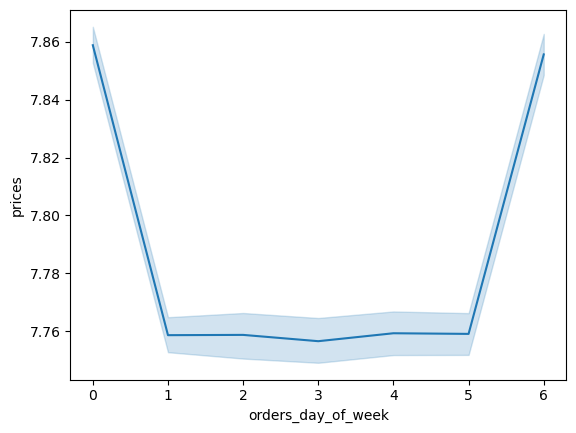

In [16]:
# Creating a line plot

line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [17]:
# Exporting the plot

line.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'line_prices_dow.png')) 

## 3. Histogram - order_hour_of_day

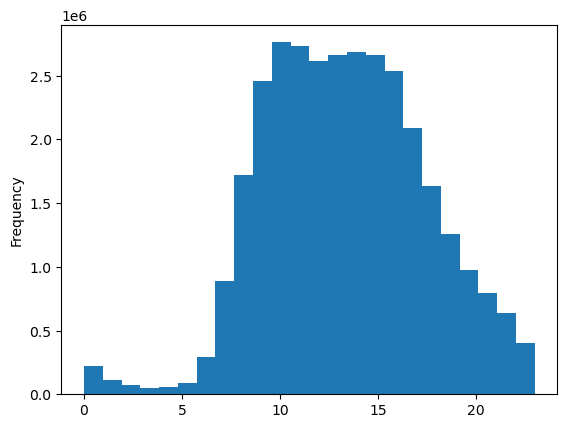

In [18]:
hist2 = ords_prods_merge['order_hour_of_day'].plot.hist(bins = 24) 

#### Most of the orders are done in the interval of 10:00 to 15:00

In [19]:
hist2.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'hist_hour-of-day.png')) 

## 4. Bar chart - loyalty_flag

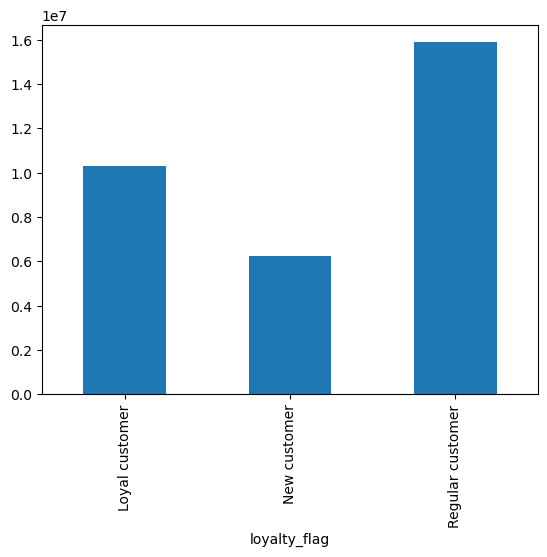

In [20]:
bar2 = ords_prods_merge['loyalty_flag'].value_counts().sort_index().plot.bar()


In [21]:
# Exporting the bar chart

bar2.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'bar_loyalty-flag.png')) 

## 5. Line -  prices vs hour of the day



In [22]:
# Creates a new smaller dataframe

df_3 = small[['order_hour_of_day','prices']]

C:\Users\Marc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Marc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


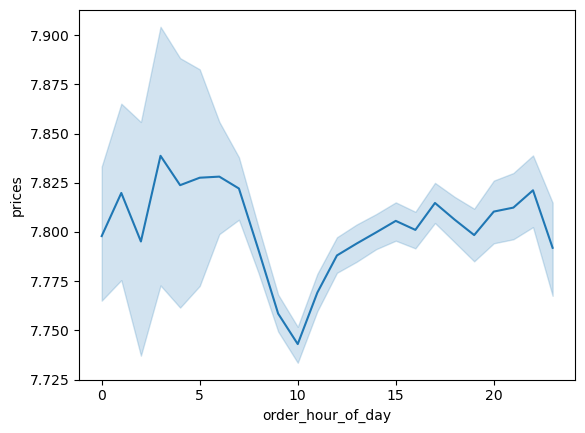

In [23]:
line2 = sns.lineplot(data = df_3, x = 'order_hour_of_day',y = 'prices')
scat.set_xticks([0, 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])

#### Around 10:00 the most purchased products are the cheapest

In [24]:
# Exporting the chart

line2.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'line_price_hour.png')) 

## 6. Line chart - age and number of dependents

In [25]:
customers.head()

,user_id,state,age,n_dependants,fam_status,income
0,26711,Missouri,48,3,married,165665
1,33890,New Mexico,36,0,single,59285
2,65803,Idaho,35,2,married,99568
3,125935,Iowa,40,0,single,42049
4,130797,Maryland,26,1,married,40374


C:\Users\Marc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Marc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


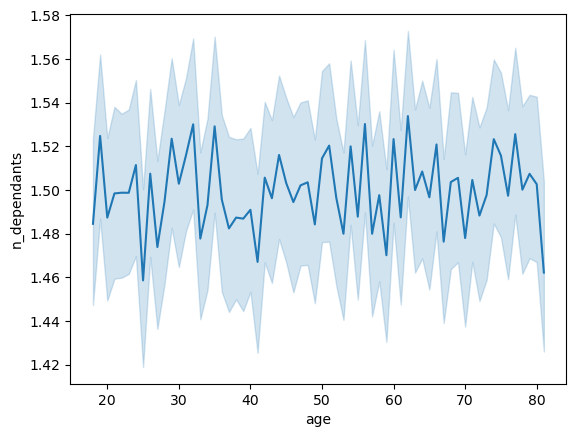

In [26]:
line3 = sns.lineplot(data = customers, x = 'age',y = 'n_dependants')


#### According to the line plot, there is no clear connection between age and number of dependents

In [27]:
# Exporting the chart

line3.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'line_age_d-dependents.png')) 

## 7. Scatter - age vs. income

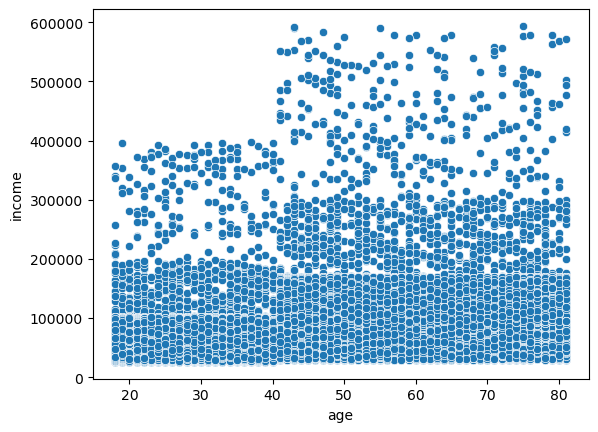

In [28]:
scat2 = sns.scatterplot(x = 'age', y = 'income', data = customers)

#### Apparently there are two groups of income according to age:
####    1- from 18 to around 40, with a smaller subset between 200k and 400k year, but mostly concentrated in 0 to 200k
####    2- older than 40, with three subsets - a smaller between 300k an 600k, another between 200k and 300k and the majority                 in 0 to 200k

In [29]:
# Exporting the chart

scat2.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'scatter_age_income.png')) 